# Formalities

- Work together in groups of four people. Sign up for a group in Studium.

- The exercise is examinated by oral examination during the exercise session 2 OR by handing in a
written report with the group’s answers to the questions Q.1-Q.16 in Studium. Name your report 
**Lab1_LastName1_LastName2_LastName3** . If you choose your work to be evaluated during
exercise session 2, make sure all the group members are present and prepare a report with the main
results to simplify the evaluation, otherwise, you will be asked to submit a full report on Studium.

# 1. Getting Started

We begin by reading an example image using OpenCV’s `imread` function:

In [1]:
import cv2
I = cv2.imread('lab1/images/napoleon.png', cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
print("Image shape:", I.shape, "Data type:", I.dtype)

Image shape: (368, 445) Data type: uint8


Running the above will load the image into array `I`. An image is stored as a 2D (grayscale) or 3D (color) NumPy array, so all array operations (addition, subtraction, etc.) can be applied to the image. The print confirms the image dimensions and data type (typically `uint8`, meaning 8-bit unsigned integers 0–255 per pixel).

# 2. Viewing Images and Saving Figures

In Python, the most common way to display an image is using Matplotlib’s `imshow`. By default, `plt.imshow` will display a 2D array with a colormap (viridis) unless instructed otherwise. We will use the grayscale colormap for intensity images and ensure the aspect ratio is correct. For example:

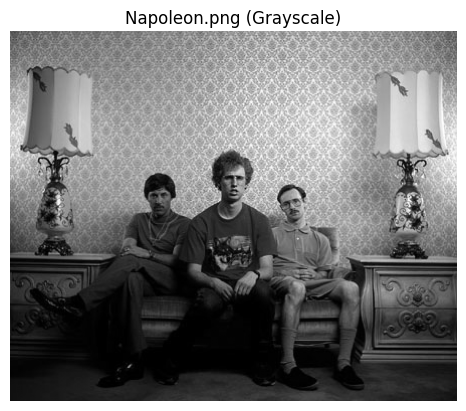

In [2]:
import matplotlib.pyplot as plt
plt.imshow(I, cmap='gray')
plt.title('Napoleon.png (Grayscale)')
plt.axis('off')            # Hide axis ticks
plt.show()

The above will show the image `I` in a new figure. We use `cmap='gray'` to display a grayscale image with its actual intensity values. Matplotlib preserves the aspect ratio by default (so circles stay circular). We can also add a color bar to visualize the intensity scale:

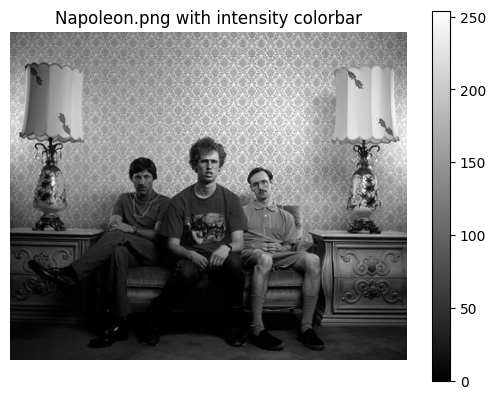

In [3]:
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.title('Napoleon.png with intensity colorbar')
plt.axis('off')            # Hide axis ticks
plt.show()

#### Q1. Where in the image is the pixel (1,1) located and what is the graylevel value? In the Python environment, verify this by checking `I[0,0]` (remember that in python indexing convention, all lists/array start indexing at 0).

**A1**: 

In [ ]:
#A1
I[0,0]

# 89

np.uint8(89)

**Saving images/figures:**
To save an image array `I` (e.g., after processing), use `cv2.imwrite('my_image.png', I)`. This writes the pixel data to a file. Example:

In [5]:
cv2.imwrite('lab1/images/my_napoleon.png', I)  # Save image I to disk

True

To save a Matplotlib figure (with overlays like colorbar), use `plt.savefig('fig.png')` on the current figure before closing it. For example:

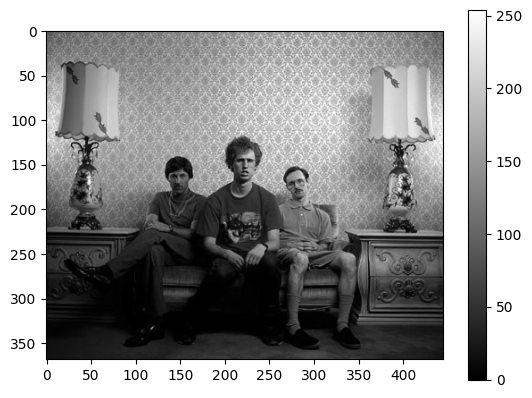

In [6]:
plt.imshow(I, cmap='gray'); 
plt.colorbar()
plt.savefig('lab1/images/nap_fig.png')

This will save the current figure as `nap_fig.png`. Make sure to call `plt.savefig` before `plt.show()`, or explicitly create a figure object to save, because after `plt.show()` in some environments the figure may be cleared.

# 3. Contrast, Brightness, and Data Types

In this section, we explore image contrast and brightness and how they relate to the intensity histogram of an image. We will use three images: `napoleon.png` (the original), `napoleon_light.png` (a brighter version), and `napoleon_dark.png` (a darker version). We also discuss how image data types (e.g., 8-bit vs floating-point) affect arithmetic operations and display.

First, let’s load the three Napoleon images and display their histograms. In Python, we can use NumPy/Matplotlib to compute and plot histograms of pixel intensities:

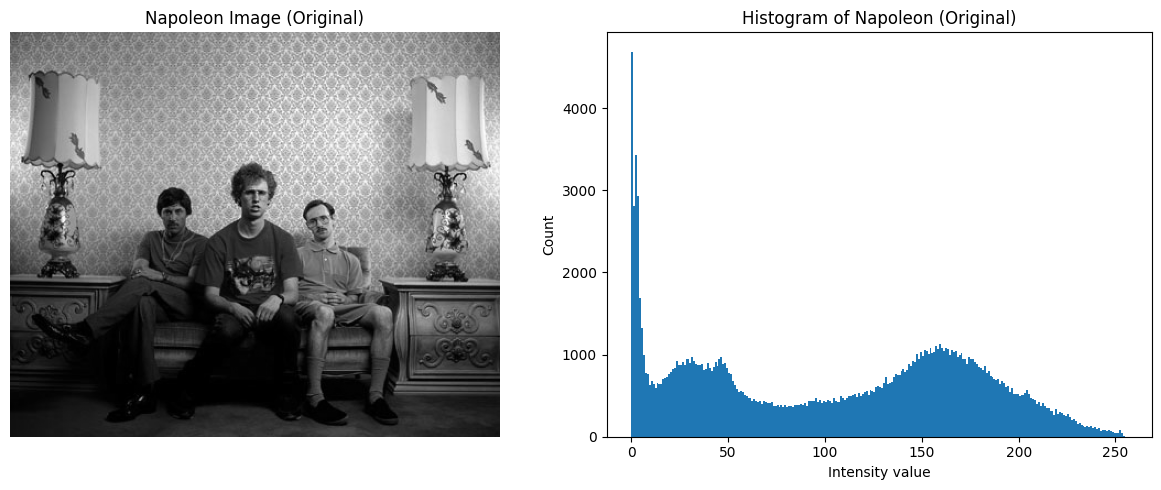

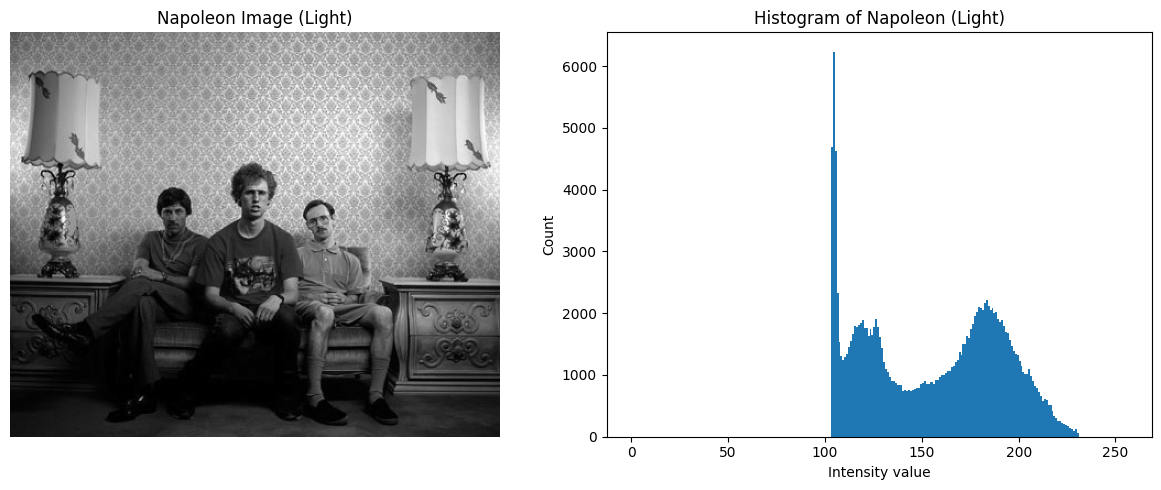

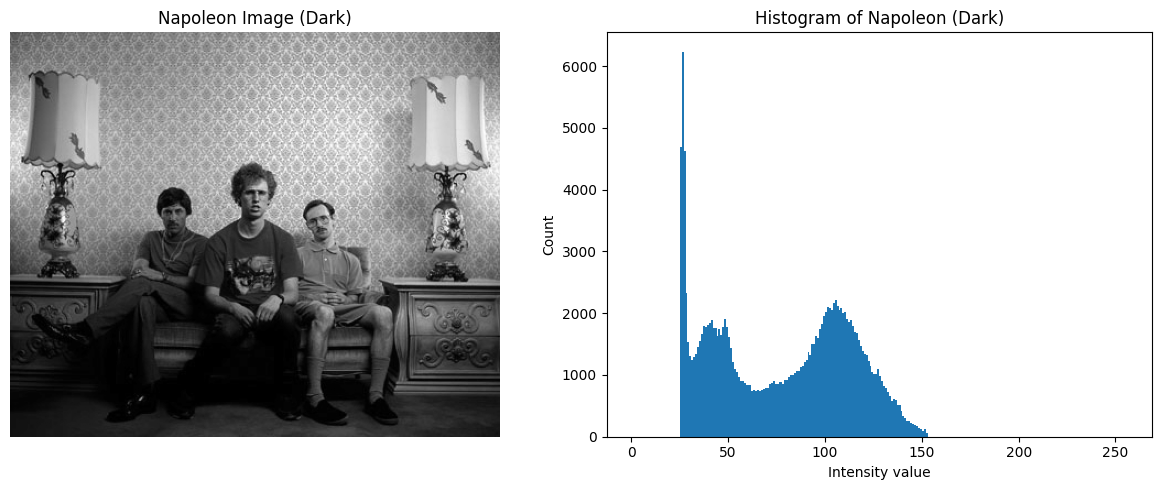

In [7]:
# Load the three images in grayscale
I_orig = cv2.imread('lab1/images/napoleon.png', cv2.IMREAD_GRAYSCALE)
I_light = cv2.imread('lab1/images/napoleon_light.png', cv2.IMREAD_GRAYSCALE)
I_dark = cv2.imread('lab1/images/napoleon_dark.png', cv2.IMREAD_GRAYSCALE)

# Create a list of images with their titles
images = [('Original', I_orig), ('Light', I_light), ('Dark', I_dark)]

# Plot histogram and image side by side for each version
for title, img in images:
    # Create a figure with 2 subplots side by side
    plt.figure(figsize=(12, 5))
    
    # First subplot: Display the grayscale image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Napoleon Image ({title})")
    plt.axis('off')  # Hide the axis
    
    # Second subplot: Display the histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title(f"Histogram of Napoleon ({title})")
    plt.xlabel('Intensity value')
    plt.ylabel('Count')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

You will see that while histograms show very different distributions of pixels' intensities, images displayed are very similar to each other. This happens because the default behavior of `plt.imshow` automatically rescales data to the range of a colormap used for visualization. We can override this by explicitly specifying the minimum and maximum data values to be mapped to minimum and maximum value in the colormap with `vmin=0,vmax=255` parameters:

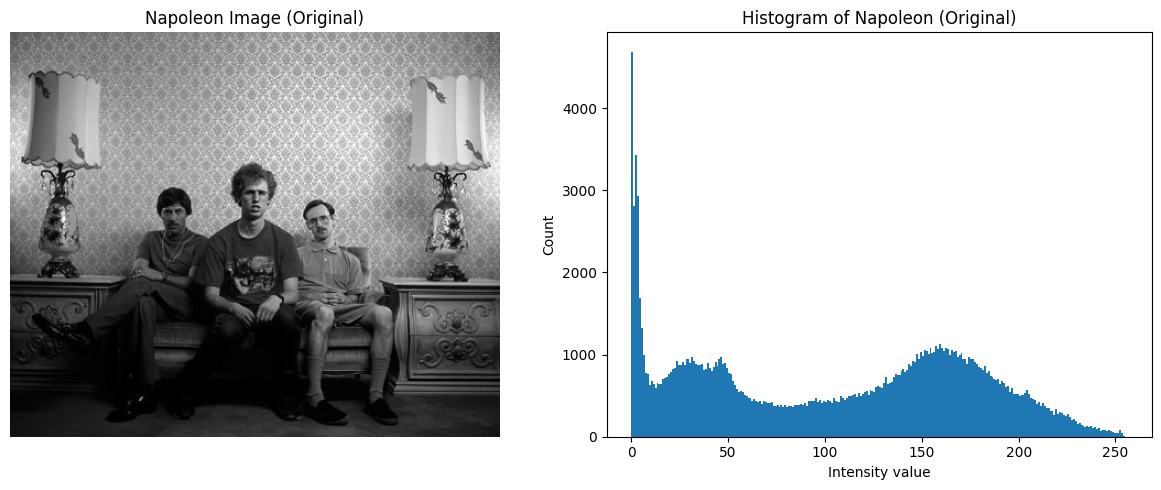

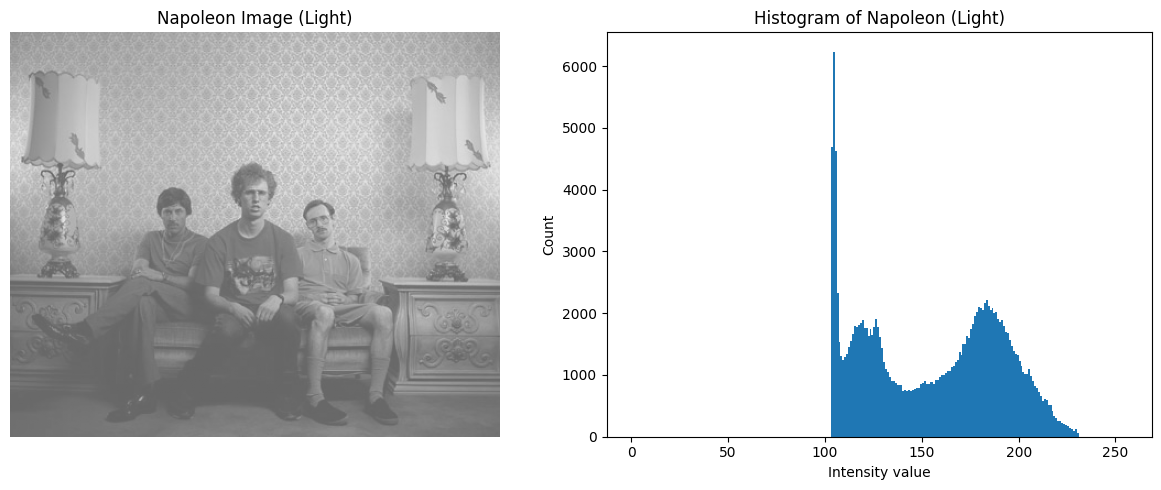

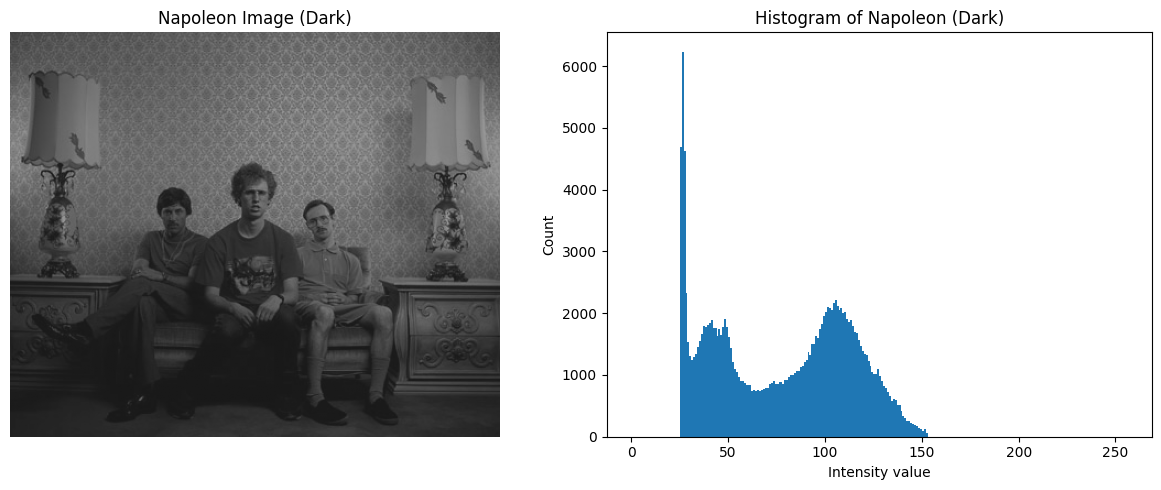

In [8]:
# Load the three images in grayscale
I_orig = cv2.imread('lab1/images/napoleon.png', cv2.IMREAD_GRAYSCALE)
I_light = cv2.imread('lab1/images/napoleon_light.png', cv2.IMREAD_GRAYSCALE)
I_dark = cv2.imread('lab1/images/napoleon_dark.png', cv2.IMREAD_GRAYSCALE)

# Create a list of images with their titles
images = [('Original', I_orig), ('Light', I_light), ('Dark', I_dark)]

# Plot histogram and image side by side for each version
for title, img in images:
    # Create a figure with 2 subplots side by side
    plt.figure(figsize=(12, 5))
    
    # First subplot: Display the grayscale image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray',vmin=0,vmax=255)
    plt.title(f"Napoleon Image ({title})")
    plt.axis('off')  # Hide the axis
    
    # Second subplot: Display the histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title(f"Histogram of Napoleon ({title})")
    plt.xlabel('Intensity value')
    plt.ylabel('Count')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

#### Q2. Explain what contrast and brightness are both in natural language and what does it mean for the numerical pixel intensities. Based on the histograms of the images `napoleon.png`, `napoleon_light.png`, and `napoleon_dark.png`,  can you tell from the histograms which image has the highest contrast and which image is the brightest?

**A2**:
Brightness refers to how light/dark an image is overall. I bright image looks washed with light and a dark image looks dim. For the numerical meaning, it means that if an image is bright the pixel values in the histogram are shifted to the right (higher values) and for dark images it's shifted left (low values). 

Contrast describes how much the light and dark parts of an image differ. A high contrast image has very destinct highlights and shadows. The numerical interpretation of contrast is how spread out the histogram is. A wide histogram coresponds to high contrast and vice versa.

The brightest image is napoleon_light because the histogram is shifted right. The image with the highest contrast is the original as the histogram has the biggest spread of values.

By default, images are saved and loaded as `uint8` (0–255), which contains only integer values. Many mathematical operations (for example division) in python will automatically convert the data type into `float`. Matplotlib is fully compatible with `float` images  and will automatically scale it to colormap colors, but be careful if you save and reload your image, which will lose the floating-point precision.
For example, consider our original image `I_orig`. First, we will create a floating-point copy of it by dividing all pixel intensities by 64 and multiplying it by 64. Second, we will do the same operations, but save the intermediate result to file and reload it:

In [ ]:
plt.imshow( I_orig/64*64, cmap='gray',vmin=0,vmax=255); plt.title('1. Division/multiplication (float)'); plt.show()
cv2.imwrite('lab1/images/my_napoleon_div64.png', I_orig/64)
I_div64 = cv2.imread('lab1/images/my_napoleon_div64.png', cv2.IMREAD_GRAYSCALE)*64
plt.imshow(I_div64, cmap='gray',vmin=0,vmax=255); plt.title('2. Division/save to file/multiplication (uint8)'); plt.show()

Note: You can explicitly convert NumPy array objects (data type that we use to store images in examples above) to different types by calling method `astype`. For example `I_orig.astype('float')` would return floating-point version of `I_orig` and `(I_orig/64).astype('uint8')` would return (0-255) version of `I_orig/64`

#### Q3. Explain the difference between two images above. What has happened to pixel data after saving and reloading intermediate calculation results as an image? Hint: Use histograms for easier analysis.

**A3**. 

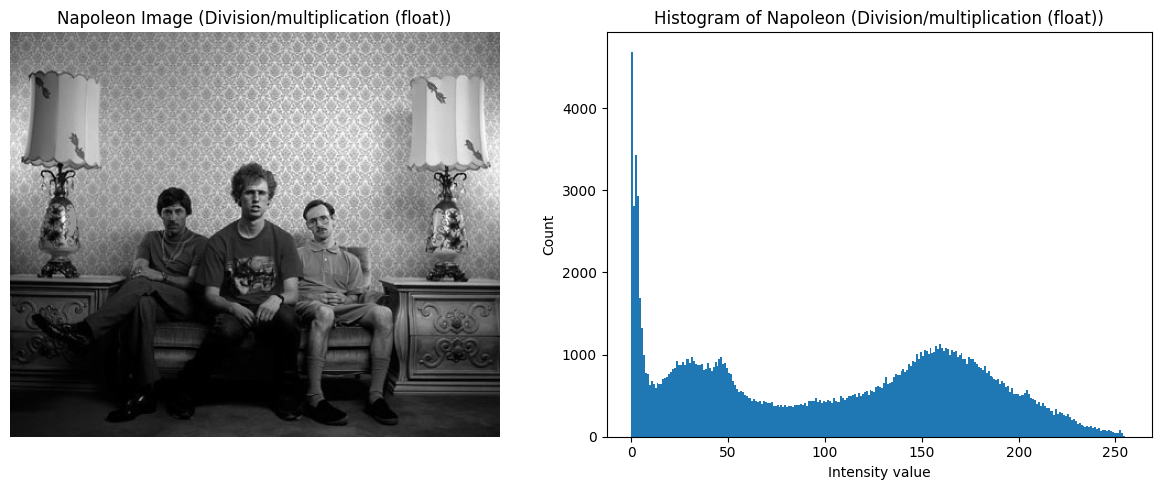

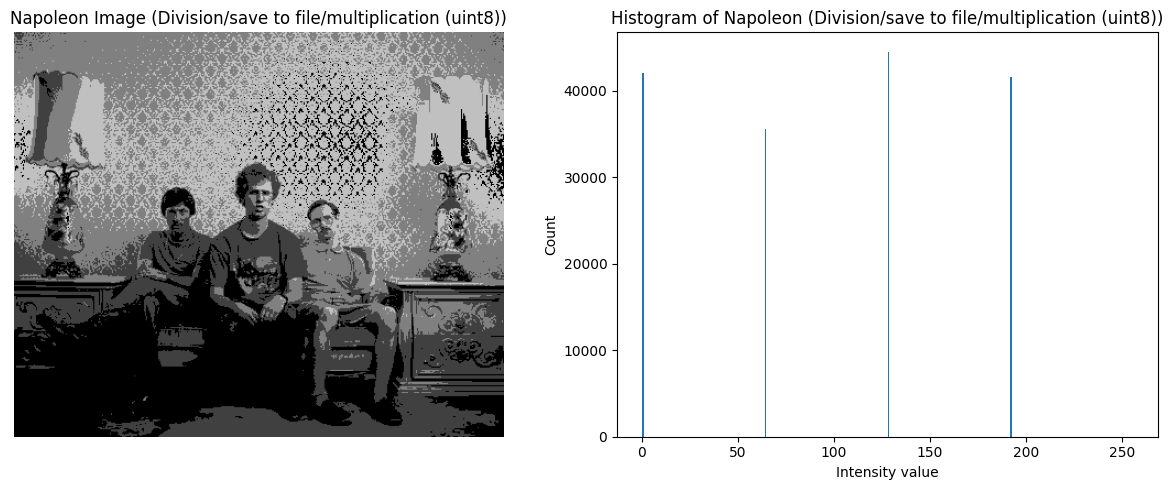

In [11]:
#A3
images = [('Division/multiplication (float)', I_orig/64*64), ('Division/save to file/multiplication (uint8)', I_div64)]

# Plot histogram and image side by side for each version
for title, img in images:
    # Create a figure with 2 subplots side by side
    plt.figure(figsize=(12, 5))
    
    # First subplot: Display the grayscale image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray',vmin=0,vmax=255)
    plt.title(f"Napoleon Image ({title})")
    plt.axis('off')  # Hide the axis
    
    # Second subplot: Display the histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title(f"Histogram of Napoleon ({title})")
    plt.xlabel('Intensity value')
    plt.ylabel('Count')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

**a3** In the case where the file is not saved between the division and multiplication:
We are able to retore the image after division. Because the division converts the pixel values to floats and we perform the multiplication directly after the division. Ex. A pixel with value 153: 153/64 = 2.390625 , 2,390625 * 64 = 153.0. 

In the case where we save in the middle:
We are not able to retore the image after division. Because the function imwrite floors fractional values. After divisions our pixel values are in the range [0, 3.984375] meaning that after flooring pixels can only have the values 0, 1, 2, 3. Multiplying these gives us the 0, 64, 128, 192 which are presant in the histogram. 
Ex. A pixel with value 153/64 = 2.390625, floor(2.390625) = 2, 2 * 64 = 128.


#### Q4. Demonstrate a mathematical expression involving `I_orig` to make it brighter. Remember to use `vmin=0,vmax=255` parameters or matplotlib will automatically rescale your image.

**A4**.

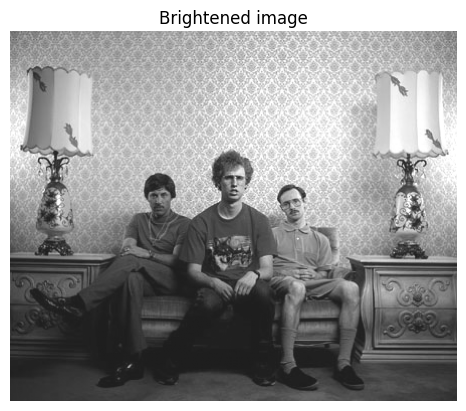

In [ ]:
#A4

# Expression: I_bright(x,y) = min(I_orig(x,y) + 30 , 255) 

import numpy as np

I_orig = cv2.imread('lab1/images/napoleon.png', cv2.IMREAD_GRAYSCALE)

I_bright = np.clip(I_orig.astype(float) + 30, 0, 255).astype('uint8') # float addition cuz uint8 would wrap around, clip is the mathimatical equivalent of min(p_xy + 30, 255)
plt.imshow(I_bright, cmap='gray', vmin=0, vmax=255)
plt.title("Brightened image")
plt.axis('off')
plt.show()

#### Q5. Demonstrate a mathematical expression involving `I_orig` to give it lower contrast.

**A5**. 

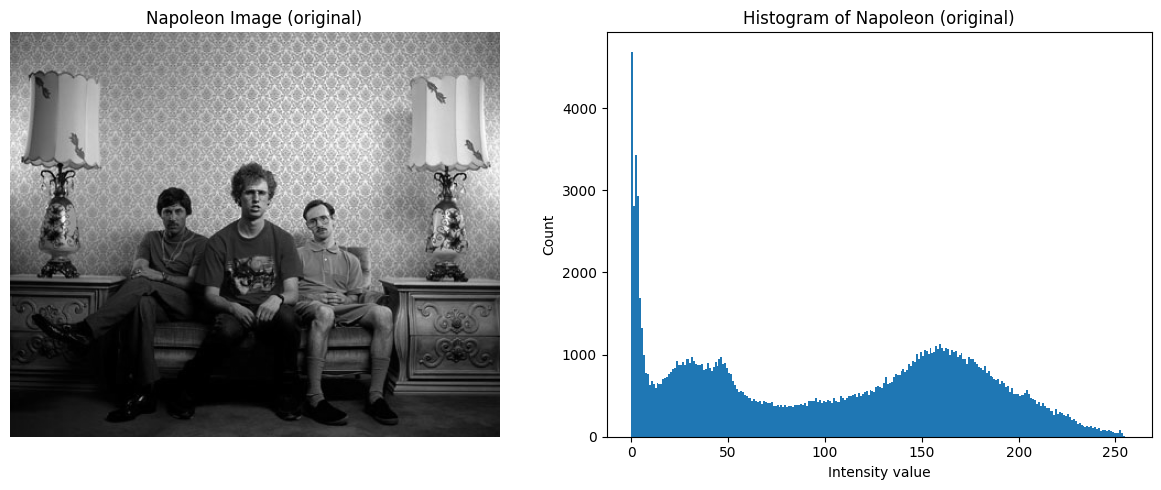

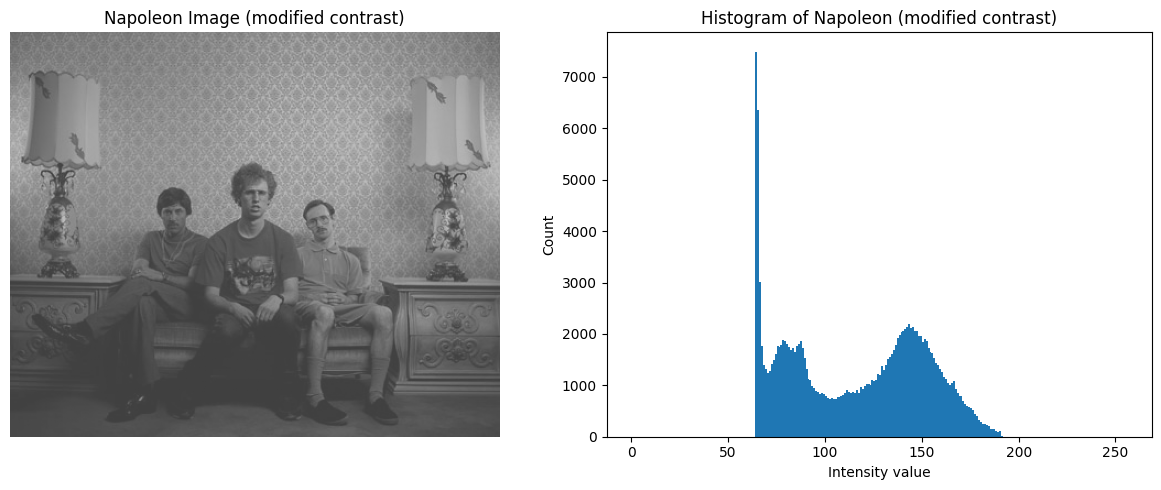

In [32]:
#A5

# I_low_contrast(x,y) = (I_orig(x,y) - 128) * alpha + 128

alpha = 0.5

I_lowC = (I_orig.astype(float) - 128) * alpha + 128 # .astype(float) avoid uint8 wrap around

images = [('original', I_orig), ('modified contrast', I_lowC)]

# Plot histogram and image side by side for each version
for title, img in images:
    # Create a figure with 2 subplots side by side
    plt.figure(figsize=(12, 5))
    
    # First subplot: Display the grayscale image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray',vmin=0,vmax=255)
    plt.title(f"Napoleon Image ({title})")
    plt.axis('off')  # Hide the axis
    
    # Second subplot: Display the histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title(f"Histogram of Napoleon ({title})")
    plt.xlabel('Intensity value')
    plt.ylabel('Count')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()


# 4. Pixelwise Transforms

Most of mathematical operations applied to numerical arrays in python will be applied pixel-wise, as we have already seen with multiplication and division. One common point transform is the gamma correction (or power-law transform): $ output\_pixel = C * (input\_pixel)^\gamma $. Typically we first normalize the input to $[0,1]$, apply power $\gamma$, then scale back to 0–255:

`
I2 = (I_orig/255)**gamma * 255
`

#### Q6. Use $\gamma=2$ and $\gamma=0.5$ and explain the resulting images.

**A6**. 

**a6**
Values between (0,1) will become larger if they raised by a power (0,1) and smaller if raised to a power > 1. The pixel values are normalized i.e (divided by 255) meanign they will be in the range (0,1) therefore using gamma 0.5 will brighten the image and using gamma = 2 will darken the image.

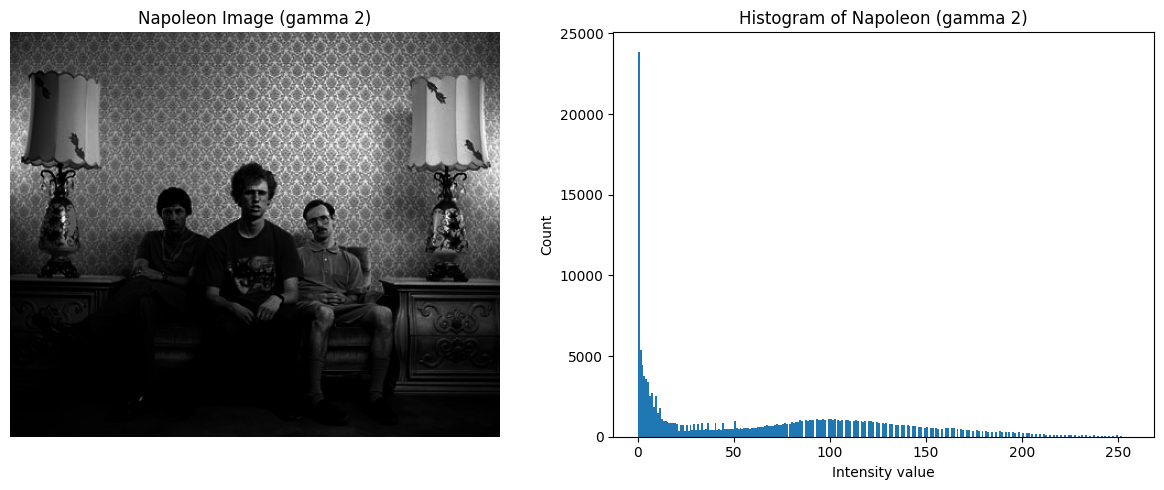

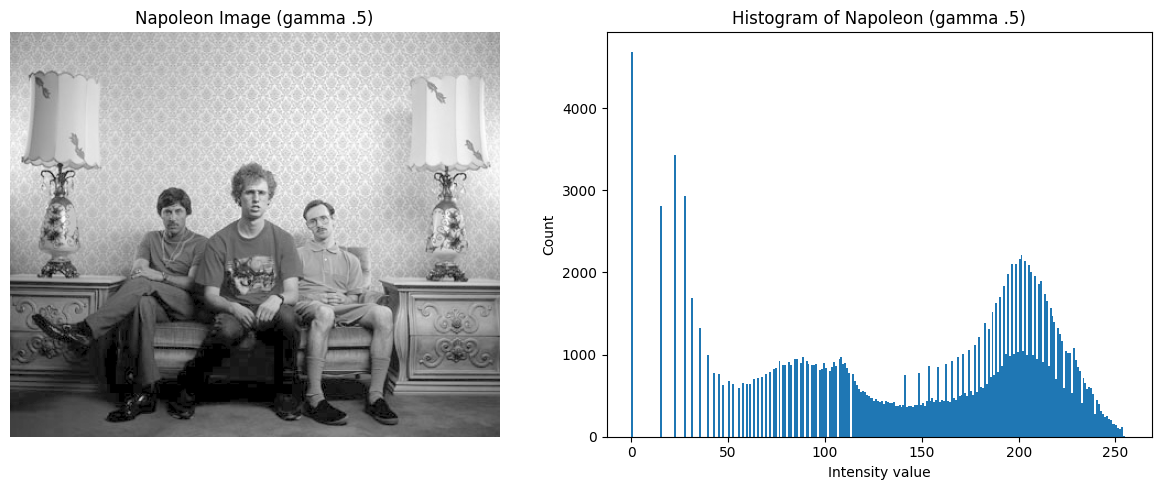

In [33]:
#A6
gamma_1 = 2
gamma_2 = 0.5

I2 = (I_orig/255)**gamma_1*255

I3 = (I_orig/255)**gamma_2*255

images = [('gamma 2', I2), ('gamma .5', I3)]

# Plot histogram and image side by side for each version
for title, img in images:
    # Create a figure with 2 subplots side by side
    plt.figure(figsize=(12, 5))
    
    # First subplot: Display the grayscale image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray',vmin=0,vmax=255)
    plt.title(f"Napoleon Image ({title})")
    plt.axis('off')  # Hide the axis
    
    # Second subplot: Display the histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title(f"Histogram of Napoleon ({title})")
    plt.xlabel('Intensity value')
    plt.ylabel('Count')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()



Histogram equalization is also a pixelwise graylevel transformation. It can be applied to an image using `I_eq = cv2.equalizeHist(I)` operation.

#### Q7. Explain how histogram equalization works in theory. Include histograms of one of the images (dark or light) before and after applying equalization, and explain what you see. Do the changes to the histograms and the images agree with the theory of histogram equalization?

**A7**. 

**a7**
Histogram equalization is a pointwise gray-level transform that redistributes pixel intensities so that the histogram becomes more uniform across all gray levels.

After the histogram equalization we see that the histogram is spread out and the image has higher contrast.

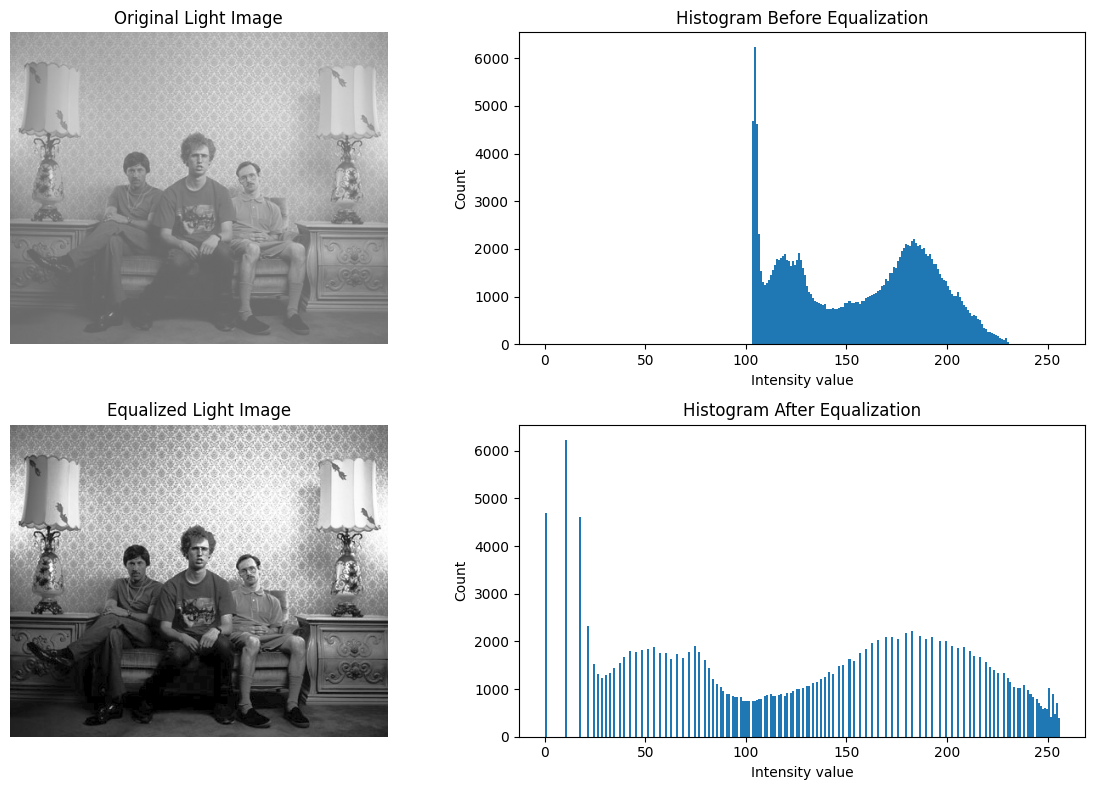

In [ ]:
#A7
I_light = cv2.imread('lab1/images/napoleon_light.png', cv2.IMREAD_GRAYSCALE)

I_light_eq = cv2.equalizeHist(I_light)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(I_light, cmap='gray', vmin=0, vmax=255)
plt.title("Original Light Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(I_light.ravel(), bins=256, range=(0, 256))
plt.title("Histogram Before Equalization")
plt.xlabel("Intensity value")
plt.ylabel("Count")

plt.subplot(2, 2, 3)
plt.imshow(I_light_eq, cmap='gray', vmin=0, vmax=255)
plt.title("Equalized Light Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(I_light_eq.ravel(), bins=256, range=(0, 256))
plt.title("Histogram After Equalization")
plt.xlabel("Intensity value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# 5. Aliasing when Sampling

When we resample or resize images, improper handling can introduce aliasing – artifacts that occur when high-frequency detail is undersampled. The lab uses an image of a zebra (with high-frequency stripe pattern) and the classic `cameraman.png` as examples. Try to downsample these images to a smaller size (78×78 pixels) using different interpolation methods and with/without anti-aliasing (low-pass filtering) to see the effects.

An easy way to resize an image in python is using `cv2.resize` function like `I_resized = cv2.resize(I, (78, 78), interpolation=cv2.INTER_NEAREST)` or `I_resized = cv2.resize(I, (78, 78), interpolation=cv2.INTER_LINEAR)`. You may look up for other available methods in OpenCV documentation.

When applied to images with regular high-frequency patterns, resizing may create aliasing artifacts. To compensate for this, we may attempt to apply low-pass filter prior to resizing, which reduces/removes higher frequencies from an image. One simple way to do this is with Gaussian filtering:
`I_filtered = cv2.GaussianBlur(I, (7,7), 0)`

Note: Default matplotlib `imshow()` behavior will resize any image to default figure size. If you want to fix on-screen pixel size to see images in fixed resolution, you may explicitly control figure size like this:<br>
`dpi = 100`<br>
`fig = plt.figure(figsize=(I.shape[0]/dpi, I.shape[1]/dpi))`<br>
`plt.imshow( I, cmap='gray',vmin=0,vmax=255); plt.show()`

#### Q8. Explain the role of the interpolation method as well as the role of the lowpass filter (anti-aliasing). Which combination of options do you prefer, and why?

**A8** 


ZEBRA RESULTS:


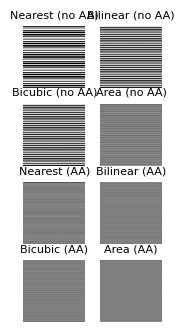

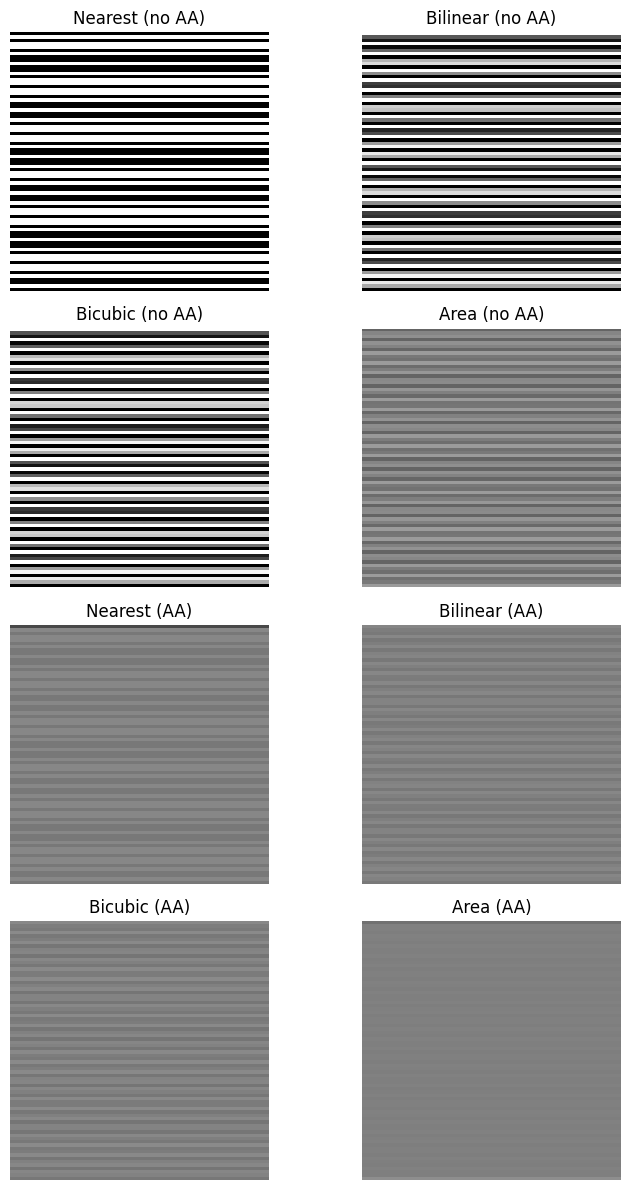

CAMERAMAN RESULTS:


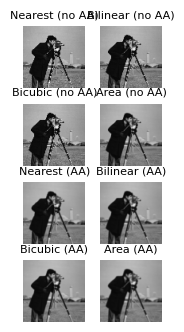

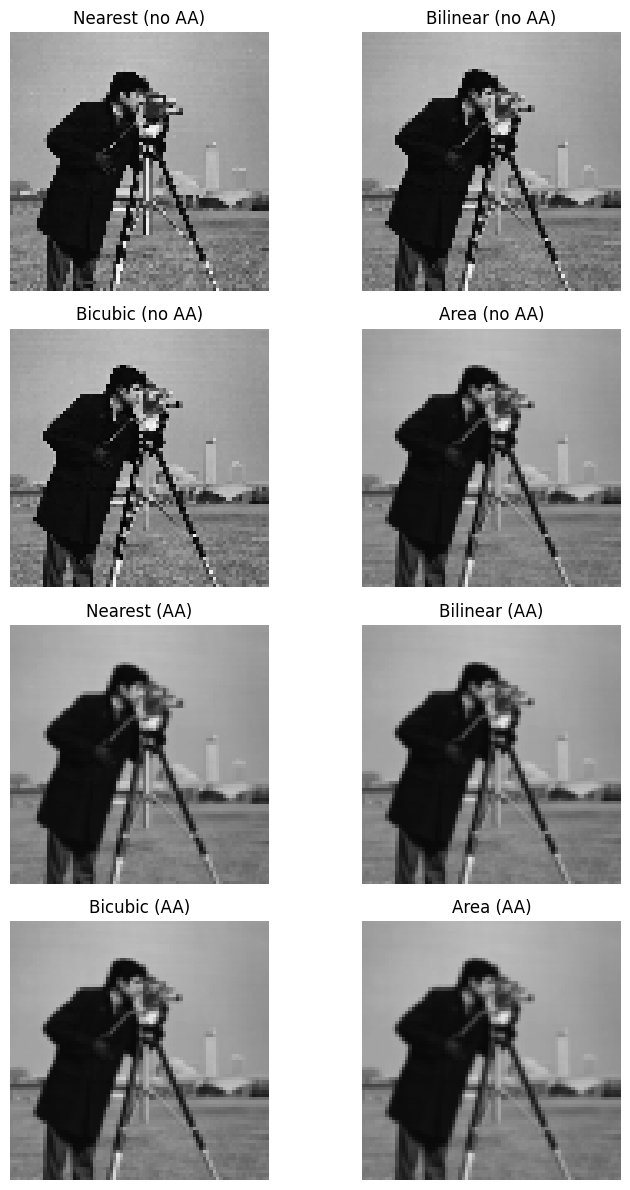

In [13]:
#A8
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_grid(images, titles, rows, cols, dpi=100):
    fig_w = cols * (images[0].shape[1] / dpi)
    fig_h = rows * (images[0].shape[0] / dpi)

    fig = plt.figure(figsize=(fig_w, fig_h), dpi=dpi)

    for i, (img, title) in enumerate(zip(images, titles)):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(img, cmap='gray', vmin=0, vmax=255)
        ax.set_title(title, fontsize=8)
        ax.axis('off')

    plt.tight_layout(pad=0)
    plt.show()
    
def show_grid_2(images, titles, rows, cols, figsize=(10,10)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def process_image(img):
    results = []
    titles = []

    # No anti-aliasing
    for name, method in methods.items():
        resized = cv2.resize(img, size, interpolation=method)
        results.append(resized)
        titles.append(f"{name} (no AA)")

    # With Gaussian blur (anti-aliasing)
    img_blur = cv2.GaussianBlur(img, (7, 7), 0)
    for name, method in methods.items():
        resized = cv2.resize(img_blur, size, interpolation=method)
        results.append(resized)
        titles.append(f"{name} (AA)")

    return results, titles

zebra = cv2.imread("lab1/images/zebra.png", cv2.IMREAD_GRAYSCALE)
camera = cv2.imread("lab1/images/cameraman.png", cv2.IMREAD_GRAYSCALE)

size = (78, 78)

methods = {
    "Nearest": cv2.INTER_NEAREST,
    "Bilinear": cv2.INTER_LINEAR,
    "Bicubic": cv2.INTER_CUBIC,
    "Area": cv2.INTER_AREA
}

zebra_results, zebra_titles = process_image(zebra)
camera_results, camera_titles = process_image(camera)

print("ZEBRA RESULTS:")

show_grid(zebra_results, zebra_titles, rows=4, cols=2)
show_grid_2(zebra_results, zebra_titles, rows=4, cols=2, figsize=(8,12))

print("CAMERAMAN RESULTS:")
show_grid(camera_results, camera_titles, rows=4, cols=2)
show_grid_2(camera_results, camera_titles, rows=4, cols=2, figsize=(8,12))


**A8**
**Role of interporation** 
The interpolation method determines how pixel values are computed when resizing images. We've used nearest, bilinear, bicubic and area. 
- **Nearest:** Selects closest pixel.
- **Bilinear:** Averages 4 neighbouring pixels.
- **Bicubic:** Averages 16 neighpouring pixels.
- **Area:** Used for downsampling. (shrinking images.)
**Role of anti-aliasing**
AA is a low pass filter applied before downsapling an image. This removes artifacts created by high frequency details of the image. This is done becasue the downsampled image can't represent these detailes.

**Preference**
For the zebra image we prefer no AA with bilinear or bicubic interpolation. Because they have the least amount of artifacting (compared to nearest) without making the image a gray blob. The other methods (Area and applying AA) losses almost all detail making the image more or less just gray.

For the cameraman AA has better results, smoothing the edges. As for the interpolation method used with AA it doesn't have a big effect on the resulting image. 


#### Q9. Can you give a real-life example of aliasing outside the area of image analysis and signal processing in general? Have you seen this phenomenon before?

**A9**. Yes, it is used in video games where 3d worlds are rendered. The videogame world can have thin lines (ex. power lines or fences, object edges) that can't be represented accurately because of the screen resolution, these thin lines will show on the screen as jagged steps especially when the line is viewed at an angle. AA solves this by smoothing these edges.

# 6. Image Arithmetic

A SPECT image shows the activity in the brain. When evaluating patient data it is often of interest to 
make a comparison with an image of a “standard” healthy brain. Standard data is created by averagin 
over a large number of images of healthy brains. The difference between the standard data and the
patient data is found by subtracti
on.
Images brain1.png and brain2.png show two SPECT images of healthy brains. Image brain3 png
shows a SPECT image of a brain from a patient with a stroke.


#### Q10. How can a “standard” healthy brain, or a mean image, of the two images brain1.png and brain2.png be constructed? Include a figure showing the standard brain.

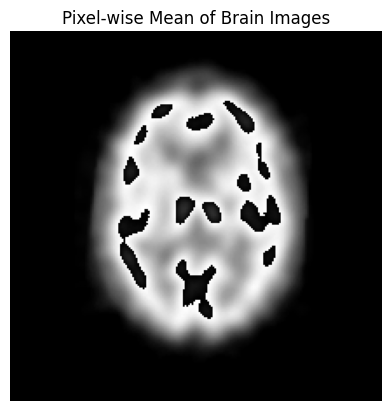

In [37]:
#A10
b1 = cv2.imread('lab1/images/brain1.png', cv2.IMREAD_GRAYSCALE)
b2 = cv2.imread('lab1/images/brain2.png', cv2.IMREAD_GRAYSCALE)

mean_b = (b1.astype(float) + b2.astype(float) / 2).astype('uint8')


plt.imshow(mean_b, cmap='gray', vmin=0, vmax=255)
plt.title("Pixel-wise Mean of Brain Images")
plt.axis('off')
plt.show()

#### Q11. Find the difference between the “standard” brain and the image from the stroke patient (brain3.png). Where in the brain is the change located?

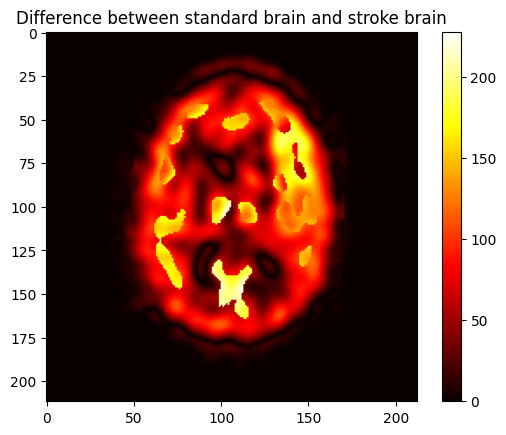

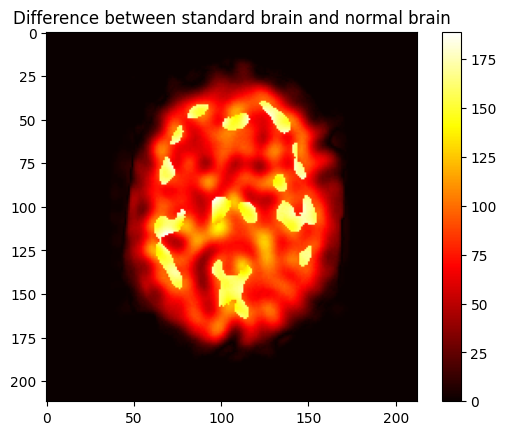

In [ ]:
#A11
b3 = cv2.imread('lab1/images/brain3.png', cv2.IMREAD_GRAYSCALE)

# diff = cv2.absdiff(b3.astype(float), pixelwisemean_b.astype(float))

diff = mean_b.astype(float) - b3.astype(float)
diff = np.abs(diff)

plt.imshow(diff.astype(np.uint8), cmap='hot')
plt.colorbar()
plt.title("Difference between standard brain and stroke brain")
plt.show()

# diff2 = cv2.absdiff(b2.astype(float), pixelwisemean_b.astype(float))
diff2 = mean_b.astype(float) - b2.astype(float)
diff2 = np.abs(diff2)

plt.imshow(diff2.astype(np.uint8), cmap='hot')
plt.colorbar()
plt.title("Difference between standard brain and normal brain")
plt.show()

#### Q12. What happens if the pixel values of uint8 images go below 0 or above 255? Did you think of this when you computed the "“standar"” brain in the previous exercise Visualize an image which would contain uint8 overflow artifacts. ?

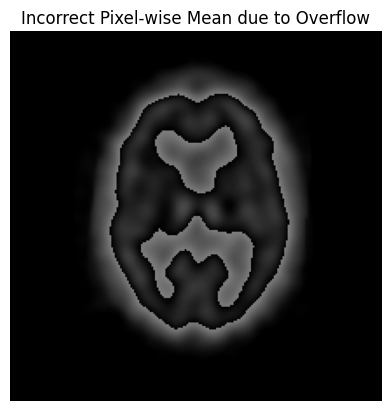

In [35]:
#A12
# Numpy uint8 wraps around on overflow. For example: 255 + 1 = 0
mean = (b1 + b2) / 2
# this will overflow when b1(x,y) + b2(x,y) > 255

plt.imshow(mean, cmap='gray', vmin=0, vmax=255)
plt.title("Incorrect Pixel-wise Mean due to Overflow")
plt.axis('off')
plt.show()



# 7. Geometric Transforms

It is sometimes necessary to geometrically correct images. In object recognition a first step can be to rotate the image so that the object is in a standard position, for example along the vertical axis. Open the image wrench.png and rotate it 20 degrees, with and without interpolation.

Hint:
Use PIL package `Image` class for simple rotation methods. You may load PIL `Image` from file:
`wrench_img = Image.open('lab1/images/wrench.png')`
or you can convert our NumPy arrays into PIL image:
`img = Image.fromarray(I)`

For rotation, use this function:

`# without interpolation (nearest)`

`img_nearest = img.rotate(20, resample=Image.NEAREST, expand=False)`

`# with bilinear interpolation`

`img_bilinear = img.rotate(20, resample=Image.BILINEAR, expand=False)`

#### Q13. Compare rotations performed with and without interpolation. It is easiest to see differences along lines and edges of the images. What does interpolation mean in this case?

**A13**:

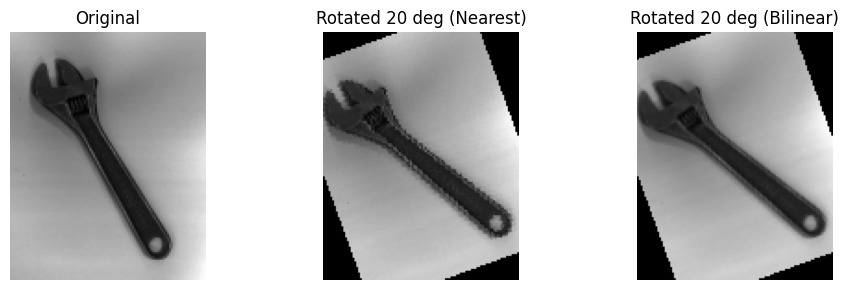

In [41]:
#A13
from PIL import Image

wrench_img = Image.open("lab1/images/wrench.png")

img_nearest = wrench_img.rotate(20, resample=Image.NEAREST, expand=False)

img_bilinear = wrench_img.rotate(20, resample=Image.BILINEAR, expand=False)

plt.figure(figsize=(10,3))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(wrench_img, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Rotated 20 deg (Nearest)")
plt.imshow(img_nearest, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Rotated 20 deg (Bilinear)")
plt.imshow(img_bilinear, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


**A13**

**Without interpolation (Nearest Neighbor):** edges are jagged; diagonal lines look blocky.

**With interpolation (Bilinear):** edges are smoother, lines more look natural. (Atleast on the wrench the edge on the paper is still jagged.)

Interpolation means computing pixel values at new locations (after rotation) using surrounding pixels, which reduces jagged artifacts.

#### Q14. In general it is faster to rotate the image by a multiple of 90 degrees than by some arbitrary degree. Explain why. For this task use `time.time()` function from `time` module.

**A14**: 

Timing results for 100 rotations:
Rotation by 90 deg (nearest): 0.002094 s
Rotation by 20 deg (nearest): 0.002362 s
Rotation by 20 deg (bilinear): 0.014751 s
Rotation by 90 deg (bilinear): 0.013716 s
Rotation by 90 deg (no resample): 0.001951 s


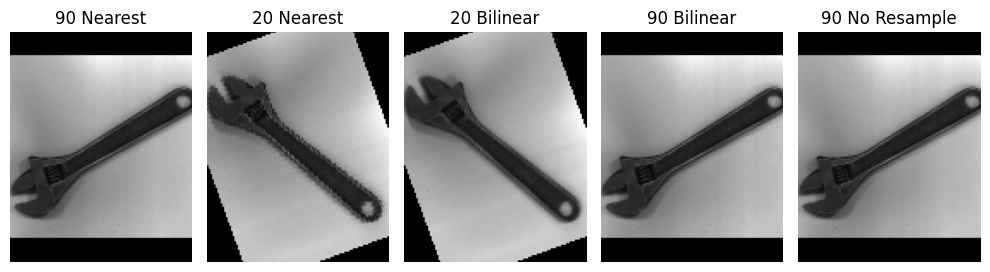

In [51]:
#A14
import time

time_90 = time_20 = time_20_bilinear = time_90_bilinear = time_90_no_resample = 0 
for i in range(10):
    start = time.time()
    for i in range(100):
        img_90 = wrench_img.rotate(90, resample=Image.NEAREST, expand=False)
    time_90 += time.time() - start

    start = time.time()
    for i in range(100):
        img_20 = wrench_img.rotate(20, resample=Image.NEAREST, expand=False)
    time_20 += time.time() - start

    start = time.time()
    for i in range(100):
        img_20_bilinear = wrench_img.rotate(20, resample=Image.BILINEAR, expand=False)
    time_20_bilinear += time.time() - start

    start = time.time()
    for i in range(100):
        img_90_bilinear = wrench_img.rotate(90, resample=Image.BILINEAR, expand=False)
    time_90_bilinear += time.time() - start

    start = time.time()
    for i in range(100):
        img_90_no_resample = wrench_img.rotate(90, expand=False)
    time_90_no_resample += time.time() - start
# avg of 10 runs
time_90 /= 10
time_20 /= 10
time_20_bilinear /= 10
time_90_bilinear /= 10  
time_90_no_resample /= 10

print("Timing results for 100 rotations:")
print(f"Rotation by 90 deg (nearest): {time_90:.6f} s")
print(f"Rotation by 20 deg (nearest): {time_20:.6f} s")
print(f"Rotation by 20 deg (bilinear): {time_20_bilinear:.6f} s")
print(f"Rotation by 90 deg (bilinear): {time_90_bilinear:.6f} s")
print(f"Rotation by 90 deg (no resample): {time_90_no_resample:.6f} s")

plt.figure(figsize=(10,3))

plt.subplot(1,5,1)
plt.imshow(img_90, cmap='gray')
plt.title("90 Nearest")
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(img_20, cmap='gray')
plt.title("20 Nearest")
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(img_20_bilinear, cmap='gray')
plt.title("20 Bilinear")
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(img_90_bilinear, cmap='gray')
plt.title("90 Bilinear")
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(img_90_no_resample, cmap='gray')
plt.title("90 No Resample")
plt.axis('off')

plt.tight_layout()
plt.show()


**A14** Nearest-neighbor rotations are very fast (0.0021 for 90 deg and 0.0024 for 20). 90 degree rotation being sligthly faster.
Bilinear interpolation significantly increases computation time (≈0.016 s) for 20 and (≈0.0148 s) 90 rotations. 
After reading docs we saw that using no resample sets resample to nearest-neighbour. 

The reason for 90 deg rotations being faster seems to be that there is no need for more computationally heavy resampling methods while arbitrary rotations require(for better quality) resampling. 


# 8. Scripting and Looping

#### Q15 Write a script performing the following steps on a random image (download one from Internet):
* Load the image.
* Convert the image to grayscale (if not already) using e.g. rgb2gray.
* Resize and/or crop the image to 128×128 pixels, without changing the aspect ratio of the image.
* Loop over the image using a 5×5 pixel window. For each such window, compute the average pixel value and store it in a new image. Treat borders in some controlled way and make sure the result has the same size as the original image. (This will require nested loops to scan rows and columns.)
* Subtract the original image from your new filtered image.
* Present the original, filtered, and subtracted images in a figure, using e.g. subplot.

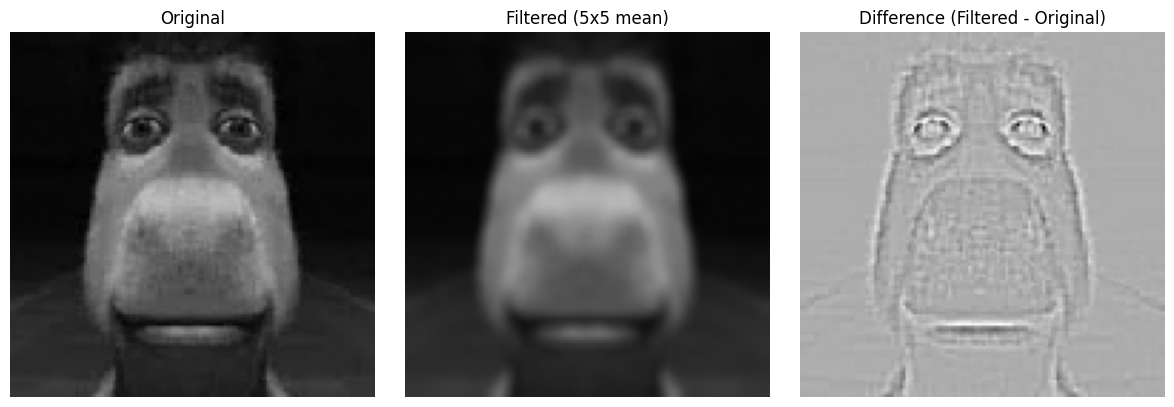

In [57]:
#A15

# 1
img = cv2.imread("lab1/images/9k.png", cv2.IMREAD_COLOR_RGB)

# 2
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 3
img_128 = cv2.resize(img_gray, (128, 128), interpolation=cv2.INTER_NEAREST)

# 4
filtered = np.zeros_like(img_128, dtype=float)
window_size = 5
offset = window_size // 2

h, w = img_128.shape # 128

for i in range(h):
    for j in range(w):
        row_start = max(i - offset, 0)
        row_end = min(i + offset + 1, h)
        col_start = max(j - offset, 0)
        col_end = min(j + offset + 1, w)

        filtered[i, j] = np.mean(img_128[row_start:row_end, col_start:col_end])

# 5
diff = filtered - img_128.astype(float)

# 6
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_128, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.title("Filtered (5x5 mean)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(diff, cmap='gray')
plt.title("Difference (Filtered - Original)")
plt.axis('off')

plt.tight_layout()
plt.show()


#### Q16 Write a script performing the following steps on a random image (download one from Internet):
* Load the image.
* Convert the image to grayscale if needed.
* Perform histogram equalization on this image using your own algorithm, without using `cv2.equalizeHist`. Efficiency is not important; you may use for-loops or other methods to compute the transformation and apply it.
* Present the original and equalized images in a figure. Compare with OpenCV native `cv2.equalizeHist` function.
* Make your own histogram equalization into a callable function (e.g. `Inew = myhist(I)`) and include the code in the report.

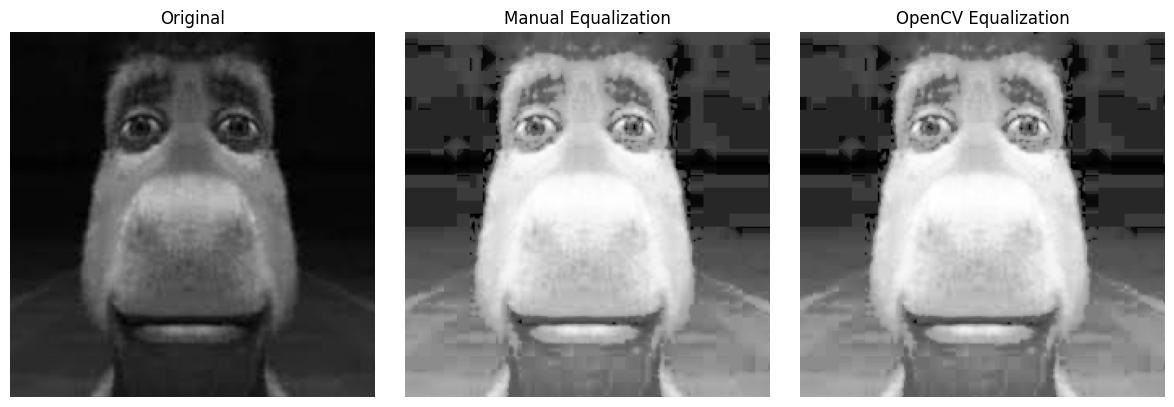

In [58]:
#A16
# 1
img = cv2.imread("lab1/images/9k.png", cv2.IMREAD_COLOR_RGB)

# 2
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 3

def myhist(I):
    hist = np.zeros(256, dtype=int)
    h, w = I.shape
    for i in range(h):
        for j in range(w):
            hist[I[i,j]] += 1
    
    cdf = np.cumsum(hist)
    cdf_normalized = (cdf - cdf.min()) / (cdf.max() - cdf.min()) * 255
    cdf_normalized = cdf_normalized.astype(np.uint8)
    
    # Map
    I_eq = np.zeros_like(I, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            I_eq[i,j] = cdf_normalized[I[i,j]]
    
    return I_eq

img_manual = myhist(img_gray)

img_cv = cv2.equalizeHist(img_gray)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_manual, cmap='gray', vmin=0, vmax=255)
plt.title("Manual Equalization")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_cv, cmap='gray', vmin=0, vmax=255)
plt.title("OpenCV Equalization")
plt.axis('off')

plt.tight_layout()
plt.show()